In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

sns.set()
sns.set_palette(sns.color_palette('tab10'))

In [2]:
df = pd.read_csv('Ipl Data/deliveries.csv')
matches = pd.read_csv('Ipl Data/matches.csv')

In [3]:
matches=matches.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 
matches=matches.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
matches=matches.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad") 
df=df.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 
df=df.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
df=df.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad") 
df=df.replace(to_replace='RG Sharma', value='R Sharma')

#Filling Null values in winner column
matches['winner'] = matches['winner'].fillna("No Result")

#Merging similar name of stadiums into one
matches=matches.replace(to_replace ="MA Chidambaram Stadium, Chepauk", value ="M. A. Chidambaram Stadium") 
matches=matches.replace(to_replace ="Punjab Cricket Association IS Bindra Stadium, Mohali", value ="Punjab Cricket Association Stadium, Mohali") 
matches=matches.replace(to_replace ="M. Chinnaswamy Stadium", value ="M Chinnaswamy Stadium") 
matches=matches.replace(to_replace ="ACA-VDCA Stadium", value ="Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium") 
matches=matches.replace(to_replace ="Rajiv Gandhi International Stadium, Uppal", value ="Rajiv Gandhi Intl. Cricket Stadium") 

In [4]:
#Adding Some more Feature Columns to deleiveris Dataset
dic = dict()
for match_id in matches['id'].unique():
    dic[match_id] = matches[matches['id']==match_id]['season'].values[0]
df['season'] = [dic[i] for i in df['match_id']]

In [5]:
# Selecting only the Death Overs i.e. 16-20 overs
df = df[df['over']>=16]
df.shape

(40400, 22)

In [6]:
matches.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium,AY Dandekar,NJ Llong,NaN


In [7]:
df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season
93,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,1,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017


[2669 1562 1515 1412 1154 1134 1073  940  911  887]


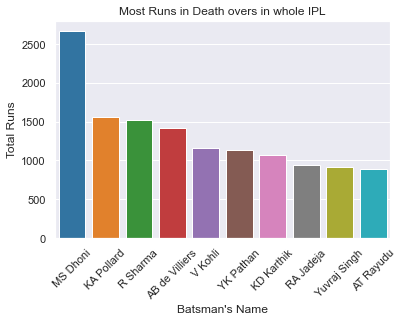

[1686  987  977  917  689  684  591  583  555  554]


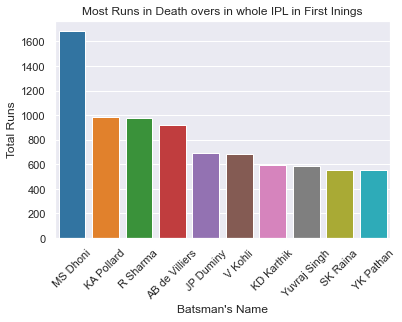

[983 580 575 538 495 482 470 451 416 381]


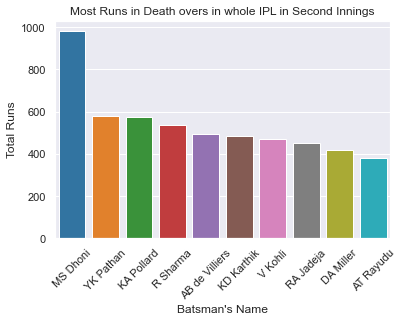

Text(0.5, 1.0, 'Comparision of Runs in First, Second and Both innings for the Top 10 Batsmen')

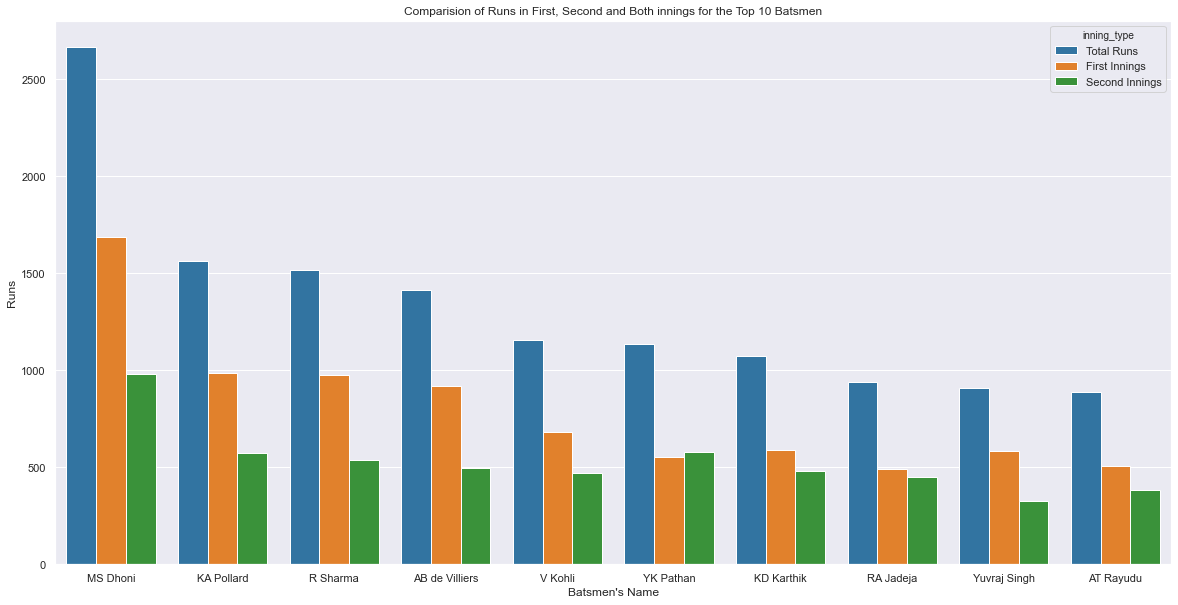

In [54]:
#Task 1

def Task_1_a(df):
    df_bats_tot = []
    for bat_name in df['batsman'].unique():
        df_tmp = df[df['batsman']==bat_name]
        df_bats_tot.append([bat_name, df_tmp['batsman_runs'].sum()])

    df_bats_tot = pd.DataFrame(df_bats_tot, columns=['batsman', 'total_runs'])
    df_bat = df_bats_tot.sort_values('total_runs', ascending = False)

    top_10 = df_bat.head(10)
    print(top_10['total_runs'].values)
    ax = sns.barplot(x = top_10['batsman'], y = top_10['total_runs'])
    plt.title('Most Runs in Death overs in whole IPL')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('Batsman\'s Name')
    ax.set_ylabel('Total Runs')
    plt.show()
    return df_bat
    
def Task_1_b(df):
    df_bats_tot = []
    for bat_name in df['batsman'].unique():
        df_tmp = df[(df['batsman']==bat_name) & (df['inning']==1)]
        df_bats_tot.append([bat_name, df_tmp['batsman_runs'].sum()])

    df_bats_tot = pd.DataFrame(df_bats_tot, columns=['batsman', 'total_runs'])
    df_bat = df_bats_tot.sort_values('total_runs', ascending = False)

    top_10 = df_bat.head(10)
    print(top_10['total_runs'].values)
    ax = sns.barplot(x = top_10['batsman'], y = top_10['total_runs'])
    plt.title('Most Runs in Death overs in whole IPL in First Inings')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('Batsman\'s Name')
    ax.set_ylabel('Total Runs')
    plt.show()
    return df_bat
    
def Task_1_c(df):
    df_bats_tot = []
    for bat_name in df['batsman'].unique():
        df_tmp = df[(df['batsman']==bat_name) & (df['inning']==2)]
        df_bats_tot.append([bat_name, df_tmp['batsman_runs'].sum()])

    df_bats_tot = pd.DataFrame(df_bats_tot, columns=['batsman', 'total_runs'])
    df_bat = df_bats_tot.sort_values('total_runs', ascending = False)

    top_10 = df_bat.head(10)
    print(top_10['total_runs'].values)
    ax = sns.barplot(x = top_10['batsman'], y = top_10['total_runs'])
    plt.title('Most Runs in Death overs in whole IPL in Second Innings')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('Batsman\'s Name')
    ax.set_ylabel('Total Runs')
    plt.show()
    return df_bat
    
df_bat_1 = Task_1_a(df)
df_bat_2 = Task_1_b(df)
df_bat_3 = Task_1_c(df)

player_name = df_bat_1['batsman'][:10].values
first_runs = [ df_bat_2[df_bat_2['batsman']==i]['total_runs'].values[0] for i in player_name ]
second_runs = [ df_bat_3[df_bat_3['batsman']==i]['total_runs'].values[0] for i in player_name ]
total_runs = df_bat_1['total_runs'][:10].values
tmp = []
for i in range(len(player_name)):
    tmp.append([player_name[i], total_runs[i], 'Total Runs'])
    tmp.append([player_name[i], first_runs[i], 'First Innings'])
    tmp.append([player_name[i], second_runs[i], 'Second Innings'])
df_bats = pd.DataFrame(tmp, columns = ['batsmen', 'runs', 'inning_type'])
fig, axes = plt.subplots(figsize=(20,10))
ax = sns.barplot(data = df_bats, x='batsmen', y='runs', hue='inning_type', ax=axes)
ax.set_xlabel('Batsmen\'s Name')
ax.set_ylabel('Runs')
plt.title('Comparision of Runs in First, Second and Both innings for the Top 10 Batsmen')

In [9]:
df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season
93,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,1,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017


[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
['MS Dhoni', 'AB de Villiers', 'KA Pollard', 'MS Dhoni', 'DJ Bravo', 'MS Dhoni', 'MS Dhoni', 'MS Dhoni', 'V Kohli', 'MK Tiwary', 'MS Dhoni', 'AD Russell']
[185, 176, 205, 265, 273, 286, 301, 236, 233, 187, 312, 367]
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
['MS Dhoni', 'AB de Villiers', 'KA Pollard', 'MS Dhoni', 'DJ Bravo', 'R Sharma', 'R Sharma', 'KA Pollard', 'V Kohli', 'MK Tiwary', 'MS Dhoni', 'AD Russell']
[150, 122, 158, 253, 196, 209, 139, 203, 155, 145, 155, 230]
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
['Y Venugopal Rao', 'R Sharma', 'V Kohli', 'LRPL Taylor', 'SPD Smith', 'MS Dhoni', 'MS Dhoni', 'DA Miller', 'KA Pollard', 'HH Pandya', 'MS Dhoni', 'AD Russell']
[76, 84, 101, 73, 101, 148, 172, 87, 107, 90, 157, 137]


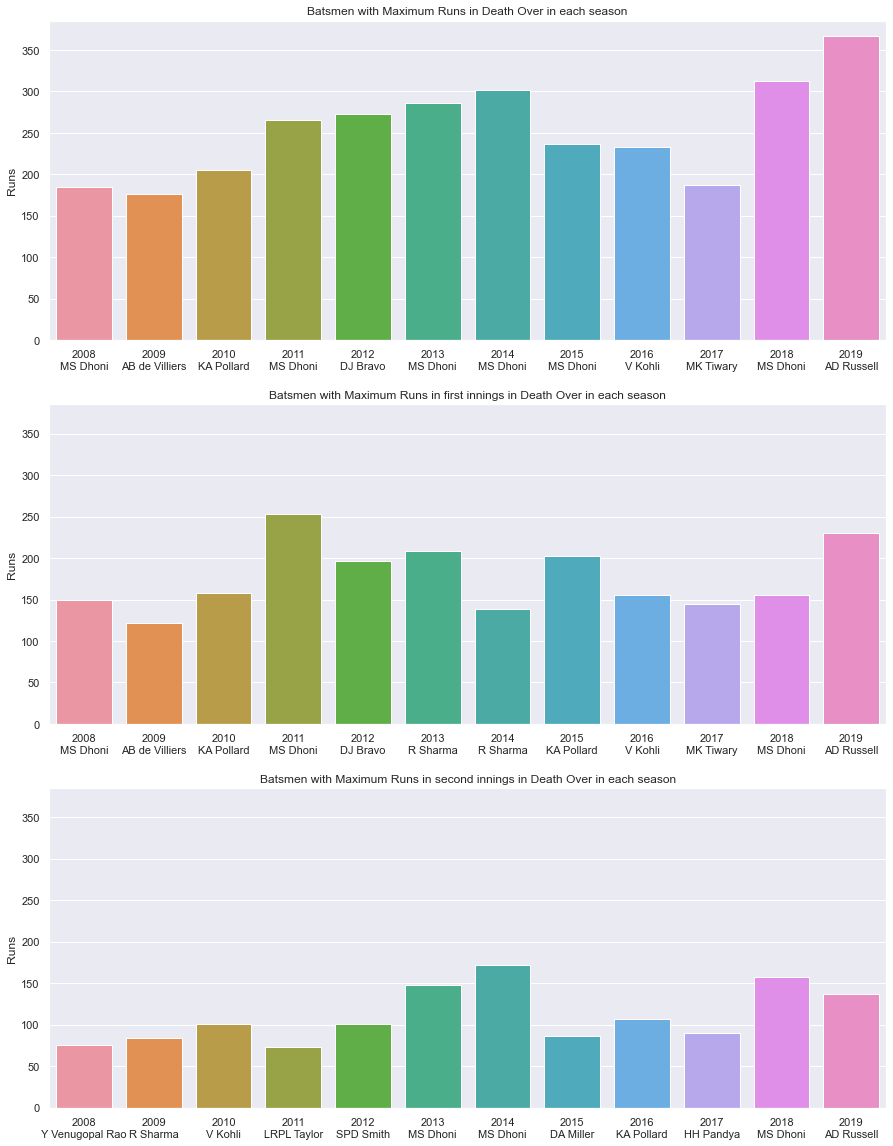

In [75]:
#Task 2

def task_2_a(df, ax):
    season = []
    batsmen = []
    runs = []
    for year in sorted(df['season'].unique()):
        df_tmp = df[df['season']==year]
        max_runs = 0
        player_name = None
        for name in df_tmp['batsman'].unique():
            tot_runs = df_tmp[df_tmp['batsman']==name]['batsman_runs'].sum()
            if tot_runs>max_runs:
                max_runs = tot_runs
                player_name = name
        season.append(year)
        batsmen.append(player_name)
        runs.append(max_runs)
    x_tmp = [(str(i)+"\n"+j) for i,j in zip(season,batsmen)]
    print(season)
    print(batsmen)
    print(runs)
    ax.set_title('Batsmen with Maximum Runs in Death Over in each season')
    ax.set_ylabel('Runs')
    sns.barplot(x=x_tmp, y=runs, ax=ax)
    
def task_2_b(df, ax):
    df = df[df['inning']==1]
    season = []
    batsmen = []
    runs = []
    for year in sorted(df['season'].unique()):
        df_tmp = df[df['season']==year]
        max_runs = 0
        player_name = None
        for name in df_tmp['batsman'].unique():
            tot_runs = df_tmp[df_tmp['batsman']==name]['batsman_runs'].sum()
            if tot_runs>max_runs:
                max_runs = tot_runs
                player_name = name
        season.append(year)
        batsmen.append(player_name)
        runs.append(max_runs)
    x_tmp = [(str(i)+"\n"+j) for i,j in zip(season,batsmen)]
    print(season)
    print(batsmen)
    print(runs)
    ax.set_title('Batsmen with Maximum Runs in first innings in Death Over in each season')
    ax.set_ylabel('Runs')
    sns.barplot(x=x_tmp, y=runs, ax=ax)
    
def task_2_c(df, ax):
    df = df[df['inning']==2]
    season = []
    batsmen = []
    runs = []
    for year in sorted(df['season'].unique()):
        df_tmp = df[df['season']==year]
        max_runs = 0
        player_name = None
        for name in df_tmp['batsman'].unique():
            tot_runs = df_tmp[df_tmp['batsman']==name]['batsman_runs'].sum()
            if tot_runs>max_runs:
                max_runs = tot_runs
                player_name = name
        season.append(year)
        batsmen.append(player_name)
        runs.append(max_runs)
    x_tmp = [(str(i)+"\n"+j) for i,j in zip(season,batsmen)]
    print(season)
    print(batsmen)
    print(runs)
    ax.set_title('Batsmen with Maximum Runs in second innings in Death Over in each season')
    ax.set_ylabel('Runs')
    sns.barplot(x=x_tmp, y=runs, ax=ax)
    
fig, axes = plt.subplots(3,1, figsize=(15,20), sharey=True)
task_2_a(df, axes[0])
task_2_b(df, axes[1])
task_2_c(df, axes[2])

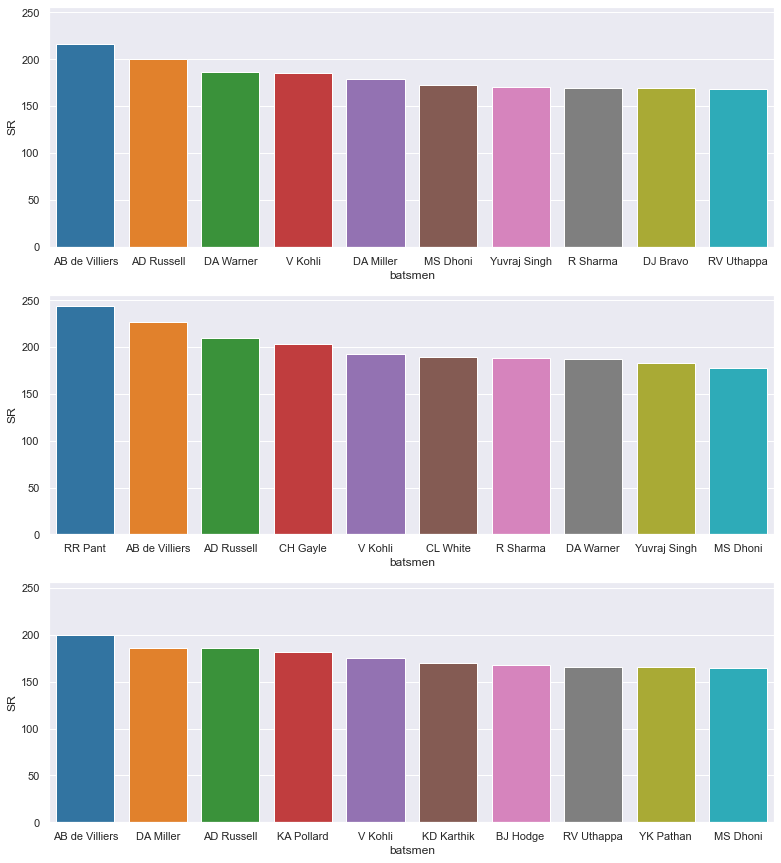

In [12]:
def task_3_a(df, df_bat_1, ax):
    names = df_bat_1[df_bat_1['total_runs']>500]['batsman'].values
    df_tmp = []
    for name in names:
        tot_runs = df_bat_1[df_bat_1['batsman']==name]['total_runs'].values[0]
        tot_balls = df[df['batsman']==name].shape[0]
        df_tmp.append([name, tot_runs/tot_balls*100])
    df_sr = pd.DataFrame(df_tmp, columns=['batsmen', 'SR'])
    df_sr = df_sr.sort_values('SR', ascending=False)
    df_sr = df_sr.head(10)
    sns.barplot(data=df_sr, x='batsmen', y='SR', ax=ax)
    
def task_3_b(df_new, df_bat_1, ax):
    df = df_new[df_new['inning']==1]
    names = df_bat_1[df_bat_1['total_runs']>250]['batsman'].values
    df_tmp = []
    for name in names:
        tot_runs = df_bat_1[df_bat_1['batsman']==name]['total_runs'].values[0]
        tot_balls = df[df['batsman']==name].shape[0]
        df_tmp.append([name, tot_runs/tot_balls*100])
    df_sr = pd.DataFrame(df_tmp, columns=['batsmen', 'SR'])
    df_sr = df_sr.sort_values('SR', ascending=False)
    df_sr = df_sr.head(10)
    sns.barplot(data=df_sr, x='batsmen', y='SR', ax=ax)
    
def task_3_c(df_new, df_bat_1, ax):
    df = df_new[df_new['inning']==2]
    names = df_bat_1[df_bat_1['total_runs']>250]['batsman'].values
    df_tmp = []
    for name in names:
        tot_runs = df_bat_1[df_bat_1['batsman']==name]['total_runs'].values[0]
        tot_balls = df[df['batsman']==name].shape[0]
        df_tmp.append([name, tot_runs/tot_balls*100])
    df_sr = pd.DataFrame(df_tmp, columns=['batsmen', 'SR'])
    df_sr = df_sr.sort_values('SR', ascending=False)
    df_sr = df_sr.head(10)
    sns.barplot(data=df_sr, x='batsmen', y='SR', ax=ax)
    
fig,ax = plt.subplots(3, 1, figsize=(13,15), sharey=True)
task_3_a(df, df_bat_1, ax[0])
task_3_b(df, df_bat_2, ax[1])
task_3_c(df, df_bat_3, ax[2])

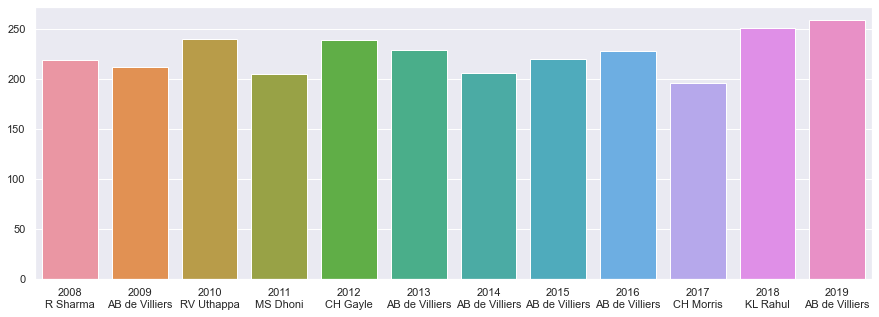

In [13]:
season  = range(2008, 2019+1)
players = []
tot_SR = []
bat_runs = []
bat_balls = []
for year in season:
    df_new = df[df['season']==year]
    max_SR = 0
    bats_name = None
    runs = 0
    balls = 0
    for name in df_new['batsman'].unique():
        df_tmp = df_new[df_new['batsman']==name]
        tot_runs = df_tmp['batsman_runs'].sum()
        tot_balls = df_tmp.shape[0]
        if tot_runs<100: continue
        SR = int(tot_runs/tot_balls*100)
        if SR > max_SR:
            max_SR = SR
            bats_name = name
            runs = tot_runs
            balls = tot_balls
    players.append(bats_name)
    tot_SR.append(max_SR)
    bat_runs.append(runs)
    bat_balls.append(balls)
x_tmp = [(str(i)+'\n'+j) for i,j in zip(season, players)]
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=x_tmp, y=tot_SR, ax=ax)

In [14]:
df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season
93,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,1,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017


In [15]:
df['dismissal_kind'].value_counts()

caught                   1961
bowled                    613
run out                   442
lbw                       122
stumped                    75
caught and bowled          74
hit wicket                  5
retired hurt                4
obstructing the field       2
Name: dismissal_kind, dtype: int64

,30,110,5,31,6,36,122,12,94,101
bowler,SL Malinga,DJ Bravo,B Kumar,SP Narine,A Nehra,UT Yadav,DW Steyn,JJ Bumrah,R Vinay Kumar,RP Singh
wickets,108,90,78,57,54,49,48,47,47,45


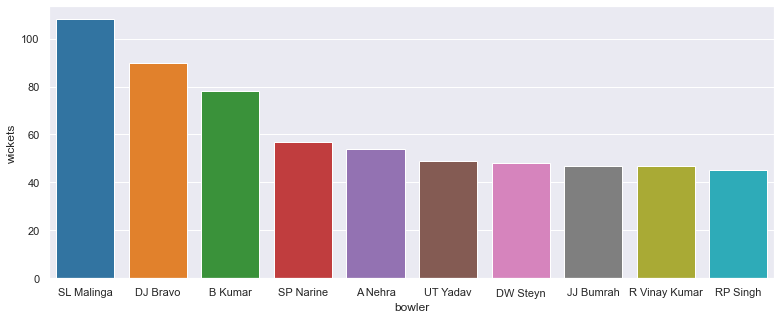

In [16]:
ways_out = ['obstructing the field', 'retired hurt', 'hit wicket', 'run out']
players = df['bowler'].unique()
df_bowl = []
for name in players:
    df_tmp = df[(df['bowler']==name) & (df['dismissal_kind'].notna())]
    wickets = 0;
    for wic_type in df_tmp['dismissal_kind']:
        if wic_type not in ways_out: wickets += 1
    df_bowl.append([name, wickets])

df_bowl = pd.DataFrame(df_bowl, columns=['bowler', 'wickets'])
df_bowl = df_bowl.sort_values('wickets', ascending=False)
df_bowl.head()

top_10 = df_bowl.head(10)
fig, ax = plt.subplots(figsize=(13,5))
sns.barplot(data=top_10, x='bowler', y='wickets', ax=ax)
top_10.T

c:\users\aprat\.conda\envs\tf_gpu1\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


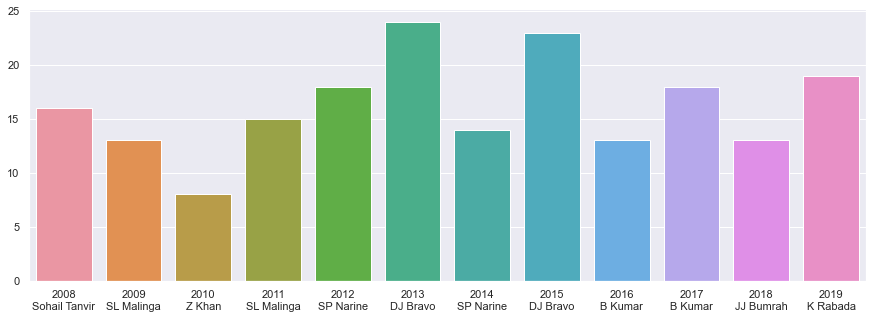

In [20]:
season = range(2008, 2019+1)
bowlers = []
wickets = []
for year in season:
    df_tmp = df[df['season']==year]
    bowl_name = None
    max_wickets = 0
    for name in df_tmp['bowler'].unique():
        df_new = df_tmp[(df['bowler']==name) & (df['dismissal_kind'].notna())]
        wicket = 0
        for wick in df_new['dismissal_kind']:
            if wick not in ways_out: wicket += 1
        if wicket>max_wickets:
            max_wickets = wicket
            bowl_name = name
    bowlers.append(bowl_name)
    wickets.append(max_wickets)
x_tmp = [str(i)+'\n'+j for i,j in zip(season, bowlers)]
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = x_tmp, y = wickets, ax=ax)

In [34]:
df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season
93,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,1,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby,2017
95,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,3,Yuvraj Singh,DJ Hooda,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2017
96,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,4,DJ Hooda,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2017
97,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,5,Yuvraj Singh,DJ Hooda,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2017


c:\users\aprat\.conda\envs\tf_gpu1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


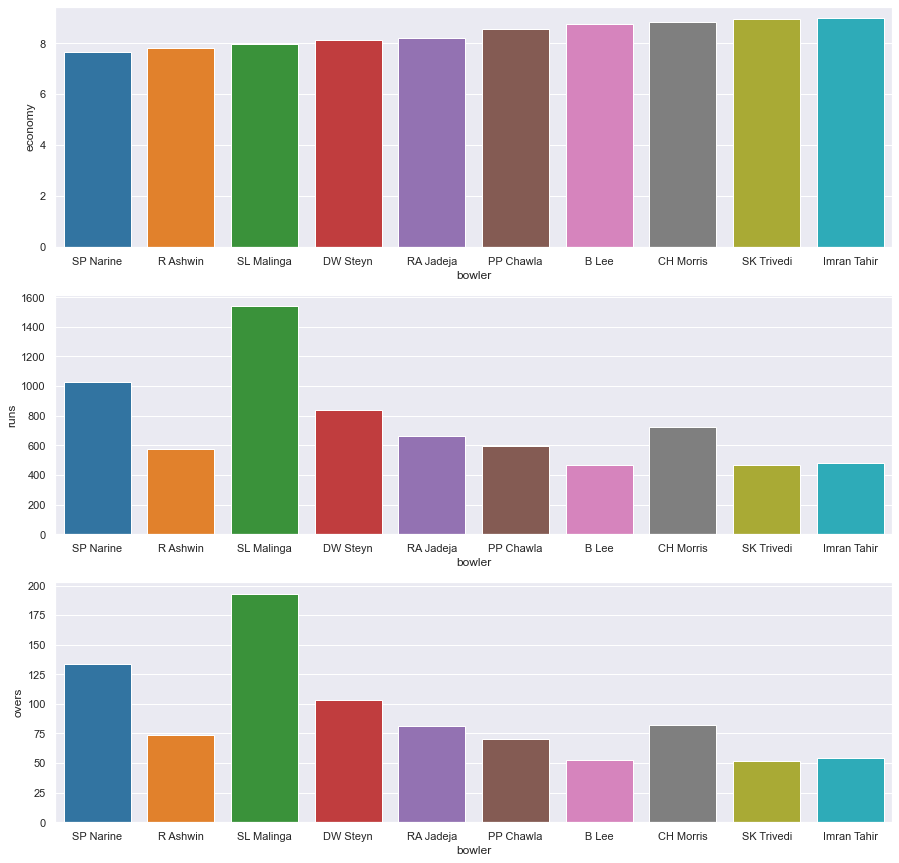

In [53]:
tmp = []
for name in df['bowler'].unique():
    df_tmp = df[df['bowler']==name]
    df_tmp['new'] = [str(i)+'_'+str(j) for i,j in zip(df_tmp['match_id'], df_tmp['over'])]
    num_of_overs = df_tmp[df_tmp['bowler']==name]['new'].unique().shape[0]
    tot_runs = df_tmp['total_runs'].sum() #- df_tmp['bye_runs'].sum() - df_tmp['legbye_runs'].sum()
    economy = tot_runs/num_of_overs
    if num_of_overs<50: continue
    tmp.append([name, num_of_overs, tot_runs, economy])
df_bowl = pd.DataFrame(tmp, columns=['bowler', 'overs', 'runs', 'economy'])
df_bowl = df_bowl.sort_values('economy')
top_10 = df_bowl.head(10)
fig, ax = plt.subplots(3, 1, figsize = (15, 15))
sns.barplot(data=top_10, x='bowler', y='economy', ax=ax[0])
sns.barplot(data=top_10, x='bowler', y='runs', ax=ax[1])
sns.barplot(data=top_10, x='bowler', y='overs', ax=ax[2])